# Analyze Supermarket Data Across the Country - Company XYZ

Company XYZ owns a supermarket chain across the country. Each major branch located in 3 cities across the country recorded sales information for 3 months, to help the company understand sales trends and determine its growth, as the rise of supermarkets competition is seen.

You will apply learnings to analyse the dataset in the data folder, and the description of each feature can be found in this [link](https://docs.google.com/document/d/1Sv-DlynHpOBAs5qKokn5MtbzqZcumTSlSI4-wQ0kf0w/edit?usp=sharing)

## Step 1 - Loading the Dataset
In this step, you will combine the dataset from each branch (3 branches) into one dataset for easy analysis. You expected to write the syntaxes that will read multiple files from your current working directory and export a CSV file after combining. 
The learning from this step is the ability to automate reading and combining multiple CSV files, because as a Data Professional, you will saddled with the responsibility of reading data from different sources, and this is one of the use case.

#### To-Do - Import Libraries

In [1]:
import os
import glob
import pandas as pd
os.chdir("C:/Users/John/Desktop/Data-Analysis-Project-main") #Current working directory that contains your dataset and code file

#### To-Do - Use glob to match the pattern "csv"

In [2]:
extension = 'csv'
path = "C:/Users/John/Desktop/Data-Analysis-Project-main" 
files = glob.glob(path + '/*.csv')



li = []

# loop through list of files and read each one into a dataframe and append to list
for f in files:
    # read in csv
    temp_df = pd.read_csv(f)
    # append df to list
    li.append(temp_df)
    print(f'Successfully created dataframe for {f} with shape {temp_df.shape}')


Successfully created dataframe for C:/Users/John/Desktop/Data-Analysis-Project-main\Abuja_Branch.csv with shape (332, 17)
Successfully created dataframe for C:/Users/John/Desktop/Data-Analysis-Project-main\Lagos_Branch.csv with shape (340, 17)
Successfully created dataframe for C:/Users/John/Desktop/Data-Analysis-Project-main\Port_Harcourt_Branch.csv with shape (328, 17)


#### To-Do - Combine all the files in the generated list above and export to a CSV
Tips - Use the `pd.concat` method

In [ ]:
# concatenate our list of dataframes into one!
df = pd.concat(li, axis=0)
print(df.shape)
df.head()
#Export to csv
df.to_csv('data.csv', index = False)

After Combining the three dataset provided we have a total of 1000 obeservations with 17 features to work with

#### To-Do -Read the CSV file using `pd.read_csv` method

In [3]:
data = pd.read_csv('data.csv')

## Step 2 - Data Exploration
In this step you will explore the loaded dataset using some built-in Pandas function. You expected to begin to think about your analytical approach from here. 
You can include other methods that you might think will make your exploration process easier. For Instance, you can write a function that print out a summary of the missing data occurence in the data. Be sure to document these methods using `markdown` and in-line `comments`.

### Import Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')  
import warnings
warnings.filterwarnings('ignore')

#### To-Do - Use the head() method to view first few rows of the dataset

In [5]:
data.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2/20/2019,13:27,Card,59227.2,4.761905,2961.36,5.9
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2/6/2019,18:07,Epay,20851.2,4.761905,1042.56,4.5
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,3/9/2019,17:03,Cash,36734.4,4.761905,1836.72,6.8


#### To-Do - Check the number of rows and columns present in the data using the shape attribute.

In [6]:
print('The Shape of the data is == {}'.format(data.shape))

The Shape of the data is == (1000, 17)


#### To-Do - Generate the names of the columns using the columns attribute.

In [7]:
print(data.columns)

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')


#### To-Do - Statiscal Summary
The describe method provides the data statistical summary for the dataset, use the method to explore the statistical summary.

In [8]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.00000
mean,20041.966800,5.510000,5536.572840,116268.029640,110731.456800,4.761905e+00,5536.572840,6.97270
std,9538.066205,2.923431,4215.177173,88518.720636,84303.543463,6.220360e-14,4215.177173,1.71858
min,3628.800000,1.000000,183.060000,3844.260000,3661.200000,4.761905e+00,183.060000,4.00000
25%,11835.000000,3.000000,2132.955000,44792.055000,42659.100000,4.761905e+00,2132.955000,5.50000
50%,19882.800000,5.000000,4351.680000,91385.280000,87033.600000,4.761905e+00,4351.680000,7.00000
75%,28056.600000,8.000000,8080.290000,169686.090000,161605.800000,4.761905e+00,8080.290000,8.50000
max,35985.600000,10.000000,17874.000000,375354.000000,357480.000000,4.761905e+00,17874.000000,10.00000


In [9]:
data.describe(include = 'O')

,Invoice ID,Branch,City,Customer type,Gender,Product line,Date,Time,Payment
count,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,3,3,2,2,6,89,506,3
top,101-17-6199,A,Lagos,Member,Female,Fashion accessories,2/7/2019,14:42,Epay
freq,1,340,340,501,501,178,20,7,345


#### To-Do - Below this cell write in few sentences what you can derive from the data statistical summary

The Above summary statistics was conducted to have an overview of the numeric and categorical vairables gives information on the following:
        <li>  Mean </li>
        <li>  Standard deviation </li>
        <li>  Minimum value </li>
        <li>  maximun value </li>
            
categorical variable:
        <li>  count </li>
        <li>  unique categories count</li>
        <li>  top category </li>
        <li>  frequency distribution of the categories </li>
    

#### To-Do - Missing values
The `isnull`, and `notna` methods can provide a quick overview of the missing data occurence, use that to observe the presence of missing data in the dataset. You can add the sum method to get a summary and not boolean values.

In [10]:
data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

The data have no missing value

#### To-Do - Data Information
The `info()` function is used to print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage. Use this method to observe the data type of each feature.

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

## Step 3 - Dealing with DateTime Features

From the summary above, you can observe that the `date` and `time` columns are not in the appropriate data type
you can convert to `datetime` datatype using the `to_datetime()` method. After that is done, use the type attribute 
to confirm the datatype. 

#### To-Do - Use `to_datetime()` to convert the `date` column to `datetime`

In [12]:
data['Date'] = pd.to_datetime(data['Date'])

#### To-Do - Check the datatype to confirm if it's in `datetime`

In [13]:
print(data['Date'].dtype)

datetime64[ns]


#### To-Do - Repeat the two steps above to the `time` column

In [14]:
data['Time'] = pd.to_datetime(data['Time'])
print(data['Time'].dtype)

datetime64[ns]


## Extract Features from date & time

#### To-Do - Extract the Day feature from the `Date` column, and save to a new `Day` column

In [15]:
data['Day'] = data['Date'].dt.day

#### To-Do - Extract the Month feature from the `Date` column, and save to a new `Month` column

In [16]:
data['Month'] = data['Date'].dt.month

#### To-Do -Extract the Year feature from the `Date` column, and save to a new `Year` column  

In [17]:
data['Year'] = data['Date'].dt.year

#### To-Do - Extract the `Hour` feature from the `Time` column and save to a new `Hour` column

In [18]:
data['Hour'] = data['Date'].dt.hour

#### Pandas provide the `nunique()` method to get a count of unique values, while the `unique()` function is used to get unique values of Series object.

#### To-Do -  From the hours information, determine the numbers of unique hours of sales in the supermarket, and return an array of the hours using the unique() method

In [19]:
data['Hour'].nunique()

1

In [20]:
hours_array = np.array(data['Hour'].unique())
hours_array 

array([0], dtype=int64)

## Step 4 - Unique Values in Columns

With the line of code below, we can get a list of the categorical column in the dataset. We iterate through the columns and check if each element is an object datatype. The result is saved to the "categorical_columns" variable
as a list.

In [21]:
categorical_columns = [col for col in data.columns if data[col].dtype == "object" ]
categorical_columns

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Payment']

#### To-Do- From the information above, generate the unique values in the categorical columns (apart from the example - Branch column).
For example, the unique values of the "Branch" column is displayed in list, as shown below.
<br/>
`df['Branch'].unique().tolist()
['B', 'C', 'A']`
</br>
<br/>
You can add print formating syntax to print out the total numbers of these values in a particular column. 

In [22]:
#Example - Uncomment the Code and Run it
data['Branch'].unique().tolist()

['B', 'A', 'C']

In [23]:
print("Total Number of unique values in the Branch Column : {}". format(len(data['Branch'].unique().tolist())))

Total Number of unique values in the Branch Column : 3


In [24]:
for x in categorical_columns:
    if x == 'Branch' or x == 'Invoice ID':
        continue
    print('Categories in {} are {}'.format(x, data[x].unique().tolist(), end = '\n'))
    print('The length of {} is == {}'.format(x, len(data[x].unique().tolist())), end = "\n")
    print('---------------------------------------------------------------------', end = "\n")

Categories in City are ['Abuja', 'Lagos', 'Port Harcourt']
The length of City is == 3
---------------------------------------------------------------------
Categories in Customer type are ['Member', 'Normal']
The length of Customer type is == 2
---------------------------------------------------------------------
Categories in Gender are ['Female', 'Male']
The length of Gender is == 2
---------------------------------------------------------------------
Categories in Product line are ['Food and beverages', 'Fashion accessories', 'Electronic accessories', 'Sports and travel', 'Home and lifestyle', 'Health and beauty']
The length of Product line is == 6
---------------------------------------------------------------------
Categories in Payment are ['Card', 'Epay', 'Cash']
The length of Payment is == 3
---------------------------------------------------------------------


#### To-Do: The `value_counts()` function is used to get a Series containing counts of unique values. For the categorical columns above, generate the count figure of the values using the `value_counts() ` method.


In [25]:
#Example
#df['City'].value_counts()

for x in categorical_columns:
    if x == 'Branch' or x == 'Invoice ID':
        continue
    print(data[x].value_counts(),end = "\n")
    print('--------------------------------------')

Lagos            340
Abuja            332
Port Harcourt    328
Name: City, dtype: int64
--------------------------------------
Member    501
Normal    499
Name: Customer type, dtype: int64
--------------------------------------
Female    501
Male      499
Name: Gender, dtype: int64
--------------------------------------
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64
--------------------------------------
Epay    345
Cash    344
Card    311
Name: Payment, dtype: int64
--------------------------------------


## Step 5 - Aggregration with GroupBy

#### To-Do - Your task here, will be to create a groupby object with the "City Column", and aggregation function of sum and mean. 

In [26]:
data.groupby(['City']).agg({'sum','mean'})

Unit price               Quantity                Tax 5%  \
                     sum          mean      sum      mean         sum   
City                                                                    
Abuja          6652396.8  20037.339759     1820  5.481928  1820531.52   
Lagos          6705176.4  19721.107059     1859  5.467647  1820577.78   
Port Harcourt  6684393.6  20379.248780     1831  5.582317  1895463.54   

                                  Total                       cogs  \
                      mean          sum           mean         sum   
City                                                                 
Abuja          5483.528675  38231161.92  115154.102169  36410630.4   
Lagos          5354.640529  38232133.38  112447.451118  36411555.6   
Port Harcourt  5778.852256  39804734.34  121355.897378  37909270.8   

                              ...  Rating             Day            Month  \
                        mean  ...     sum      mean   sum       mean   sum   
City                          ...                                            
Abuja          109670.573494  ...  2263.6  6.818072  5068  15.265060   665   
Lagos          107092.810588  ...  2389.2  7.027059  5232  15.388235   688   
Port Harcourt  115577.045122  ...  2319.9  7.072866  4956  15.109756   640   

                           Year       Hour       
                   mean     sum  mean  sum mean  
City                                             
Abuja          2.003012  670308  2019    0    0  
Lagos          2.023529  686460  2019    0    0  
Port Harcourt  1.951220  662232  2019    0    0  

[3 rows x 24 columns]

#### To-Do - Using the groupby object, display a table that shows the gross income of each city, and determine the city with the highest total gross income.

In [27]:
data.groupby(['City'])['gross income'].sum().reset_index()

,City,gross income
0,Abuja,1820531.52
1,Lagos,1820577.78
2,Port Harcourt,1895463.54


Port Harcourt appears to be the city with the highest gross income

In [28]:
# Optional - You can explore other columns such as "Unit Price", "Quantity" etc. 

data.groupby(['City']).agg({'Unit price': 'sum', 'Quantity': 'max', 'Rating': 'count'})

,Unit price,Quantity,Rating
City,,,
Abuja,6652396.8,10,332
Lagos,6705176.4,10,340
Port Harcourt,6684393.6,10,328


Lagos branch appears to be the store with the highest sum of unit price 

## Step 6 - Data Visualization

In this section, you will provide answer to some questions by generating charts and making use of different plotting styles. You will use the `Seaborn visualization` library to generate your plots. For all visualizations, include a chart title by using the seaborn `set_title` method

#### To-Do- Using `countplot`, determine the branch with the highest sales record. Optional - You can extend this to determine - most used payment method, city with the most sales

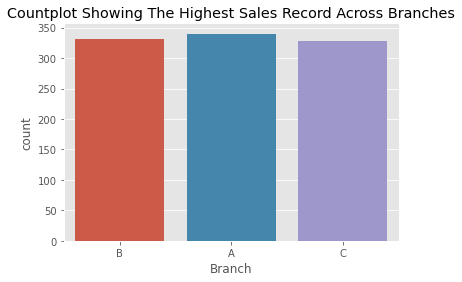

In [29]:
sns.countplot('Branch', data = data).set_title('Countplot Showing The Highest Sales Record Across Branches');

The branch with the highest sales record for the month is Lagos Branch

#### Explore a countplot for the `Payment` and `City` Column

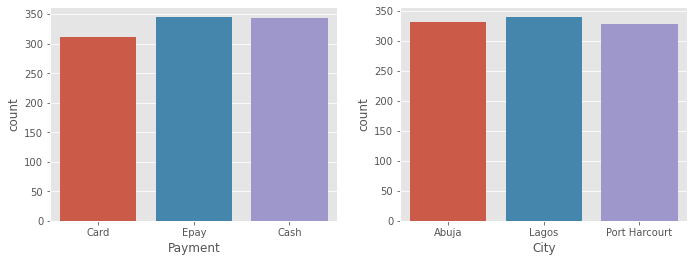

In [30]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4))
sns.countplot('Payment', data = data, ax = axes[0])
sns.countplot('City', data = data, ax = axes[1])
fig.tight_layout(pad = 2.0)

The most used payment method used across the three branches appear to by evenly distributed between The epay payment system and cash mode of payment

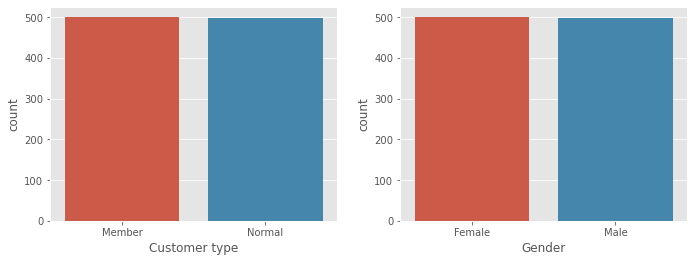

In [31]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4))
sns.countplot('Customer type', data = data, ax = axes[0])
sns.countplot('Gender', data = data, ax = axes[1])
fig.tight_layout(pad = 2.0)

* The distribution of male and female customers across all branches appears to be the same
* The distribution of registered member patronizing the three stores appears to be the same with non registered members

#### To-Do - Determine the highest & lowest sold product line, using Countplot 
Count Plot Tips- Set the `Product line` column to y-axis to prevent congestion on the x-axis

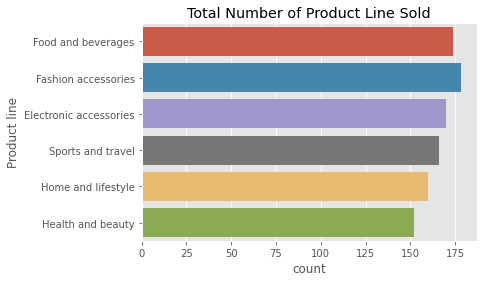

In [32]:
sns.countplot(y = 'Product line', data = data)
plt.title('Total Number of Product Line Sold');

     - The highest product line sold across the three branches appears to be Food and Beverages products
     - The lowest product line sold across the three branches appears to be the health and beauty product

#### To-Do -  Determine the Payment channel used by most customer to pay for each product line. Count Plot Tips- Set the "product line" column to y-axis to prevent congestion on the x-axis, and use the "hue" parameter for the "Payment" column. 

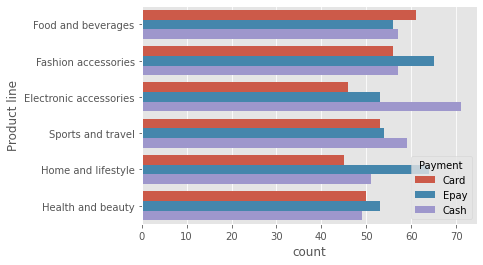

In [33]:
sns.countplot(y= 'Product line', hue = 'Payment', data = data);

<b>Food and Beverages:</b>

    - The highest payment system used by customers was Card method of payment
    - The lowest payment system used by customers was Epay method of payment 
    
<b>Fashion accessories:</b>

      - The highest payment system used by customers was Epay method of payment
      - The lowest payment system used by customers was Card method of payment 
      
<b>Electronic Accessories:</b>

     - The highest payment system used by customers was Cash method of payment
     - The lowest payment system used by customers was card method of payment 
     
<b>Sport and Travel:</b>

     - The highest payment system used by customers was Cash method of payment
     - The lowest payment system used by customers was Card method of payment 
     
<b>Home and Lifestyle:</b>

     - The highest payment system used by customers was Epay method of payment
     - The lowest payment system used by customers was Card method of payment 
     
<b>Home and Beauty:</b>

     - The highest payment system used by customers was Epay method of payment
     - The lowest payment system used by customers was Cash method of payment 

#### To-Do- Determine the Payment channel for each branch.
Count Plot Tips - Use the hue parameter for the "branch" column

<AxesSubplot:xlabel='count', ylabel='Payment'>

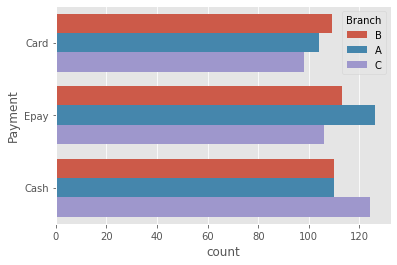

In [34]:
sns.countplot(y = 'Payment', hue = 'Branch', data = data)

   - Card Method of Payment appears to be dominant in Branch B (Abuja) compared to other branches
   - Epay Method of Payment appears to be dominant in Branch A (Lagos) compared to other branches
   - Cash Method of Payment appears to be dominant in Branch C (Port Harcourt) compared to other branches

#### To-Do- Determine the branch with the lowest rating. This you can determine using abox plot which gives a statistical summary of the plotted features, and you can pick out the branch with the lowest rating from the plot

<AxesSubplot:xlabel='Branch', ylabel='Rating'>

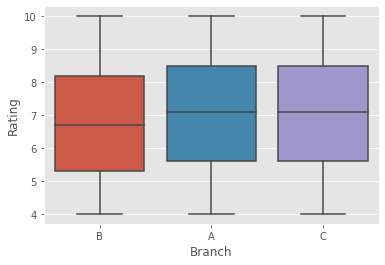

In [35]:
sns.boxplot(x ='Branch', y ='Rating', data = data)

  - Branch B appears to be the branch with the lowest Rating and the rating distribution across Branch A and C appears to be the same
  - 75% of the rating in branch B were lower than 8.2

#### To-Do - The gender type often affects the kind of products being purchased at the supermarket. 
* Using a catplot() generate visualization for the "product line" on x-axis, quantity on the y-axis, and hue as gender. 
<br/>

#### Set the aspect parameter to 4, so can you can effectively space out each product line. 



* Plot the same chart, but `Total Column` as the y-axis

* Write a summary of the insights you can pick from this chart.

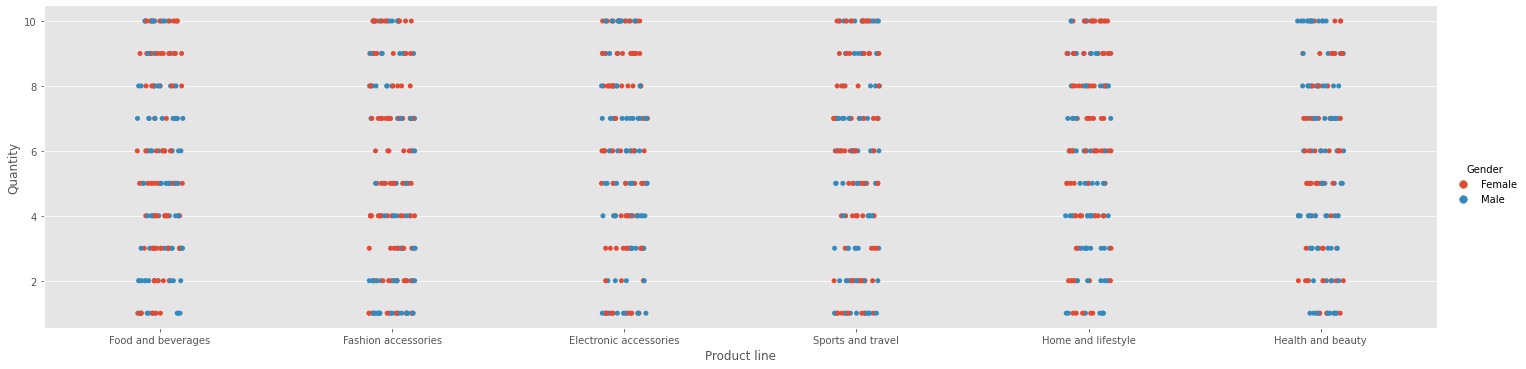

In [36]:
sns.catplot(x = 'Product line', y= 'Quantity', hue = 'Gender', data = data, aspect = 4)

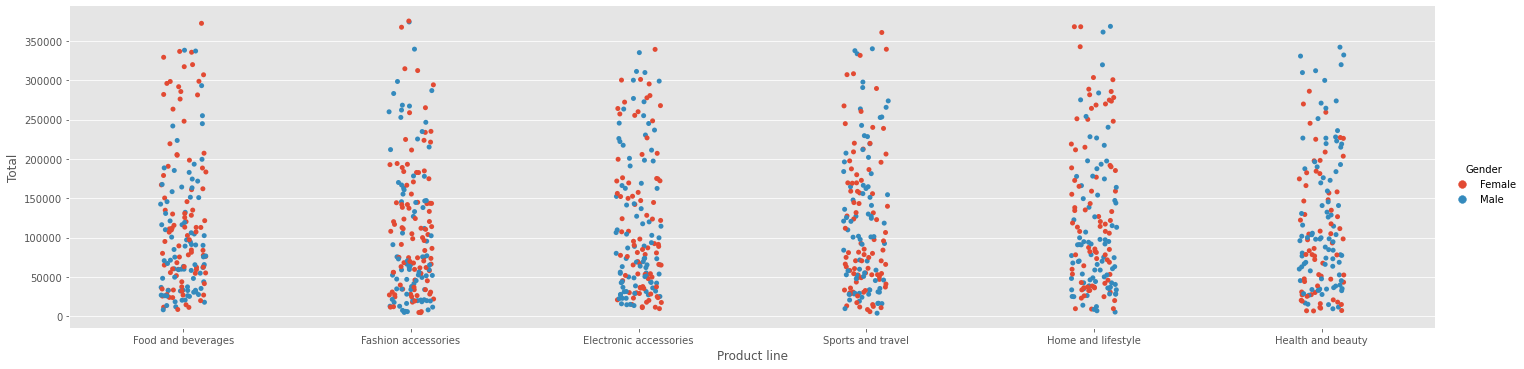

In [37]:
sns.catplot(x = 'Product line', y= 'Total', hue = 'Gender', data = data, aspect = 4)

<AxesSubplot:xlabel='Total', ylabel='Product line'>

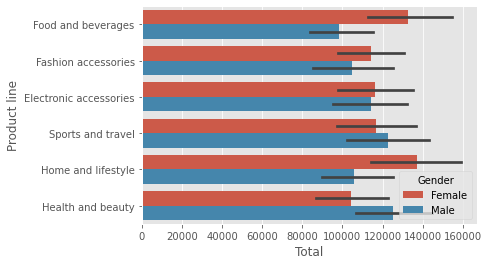

In [38]:
sns.barplot(y = 'Product line', x= 'Total', hue = 'Gender', data = data)

From the above charts listed below are the product lines dominated by female buyers
  - Food and beverages
  - Fashion Accessories
  - Home and Lifestyle
  
while the rest are dominated by the male buyers with close range when compared to the female buyers

#### To-Do -  An interesting insight to explore is the interaction of Unit price on the Quantity of goods purchased. To achieve this: 
* Use the `catplot()` to plot `Product line per unit price`, and `Product line per Quantity`. Set the kind parameter to `point` 
* In a new cell, Write a summary of the insights you uncovered

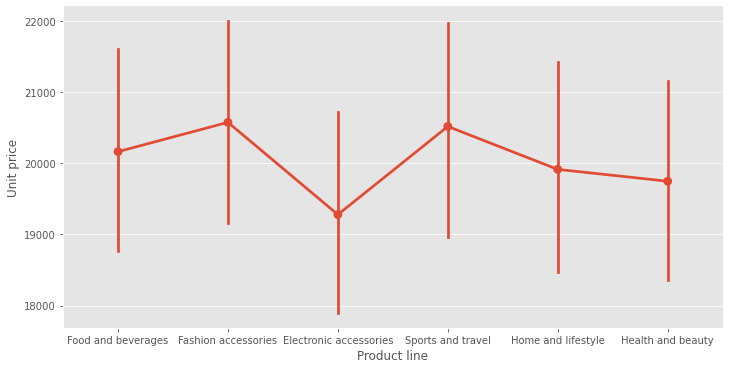

In [39]:
sns.catplot(y = 'Unit price', x = 'Product line', data = data, kind = 'point', aspect = 2)

In [40]:
data.groupby(['Product line'])['Unit price'].agg('mean').reset_index().sort_values(by = 'Unit price')

,Product line,Unit price
0,Electronic accessories,19278.571765
3,Health and beauty,19747.610526
4,Home and lifestyle,19914.097500
2,Food and beverages,20163.186207
5,Sports and travel,20517.571084
1,Fashion accessories,20575.314607


The product line with the highest mean unit price is The fashion Fashion Accessories while the product with the lowest mean unit price is the Electronic accessories

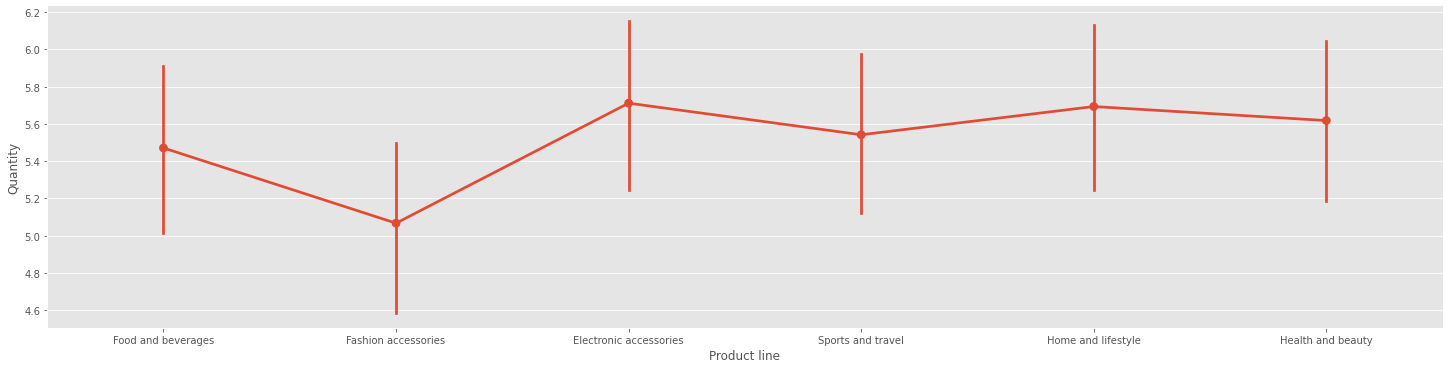

In [41]:
sns.catplot(y = 'Quantity', x = 'Product line', data = data, kind = 'point', aspect = 4)

In [42]:
data.groupby(['Product line'])['Quantity'].agg('mean').reset_index().sort_values(by = 'Quantity')

,Product line,Quantity
1,Fashion accessories,5.067416
2,Food and beverages,5.471264
5,Sports and travel,5.542169
3,Health and beauty,5.618421
4,Home and lifestyle,5.693750
0,Electronic accessories,5.711765


The highest mean quantity product line sold out is Electronic Accessories while the lowest mean quantity product line sold out is fashion accessories

#### Branch with the highest gross Income and which product line dominate


<AxesSubplot:xlabel='City'>

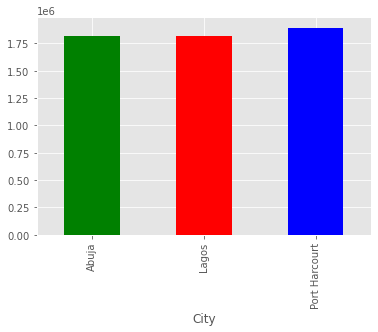

In [43]:
data.groupby('City')['gross income'].sum().plot(kind = 'bar', color = {'blue', 'red', 'green'})

Port Harcourt branch has the highest gross income value

In [44]:
port = data[data['City'] == 'Port Harcourt']
port.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour
672,226-31-3081,C,Port Harcourt,Normal,Female,Electronic accessories,5500.8,5,1375.20,28879.20,...,2021-06-10 10:29:00,Cash,27504.0,4.761905,1375.20,9.6,8,3,2019,0
673,699-14-3026,C,Port Harcourt,Normal,Male,Electronic accessories,30740.4,7,10759.14,225941.94,...,2021-06-10 18:30:00,Epay,215182.8,4.761905,10759.14,4.1,25,3,2019,0
674,315-22-5665,C,Port Harcourt,Normal,Female,Home and lifestyle,26481.6,10,13240.80,278056.80,...,2021-06-10 11:38:00,Epay,264816.0,4.761905,13240.80,8.0,24,2,2019,0


<AxesSubplot:xlabel='Product line'>

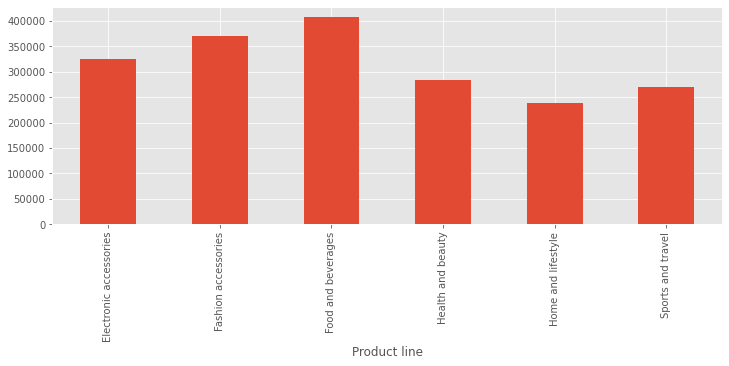

In [45]:
plt.figure(figsize = (12, 4))
port.groupby(['Product line',])['gross income'].sum().plot(kind = 'bar')

from the above chart Food and Beverages has the highest gross income in port harcourt branch 

<AxesSubplot:xlabel='Product line', ylabel='gross income'>

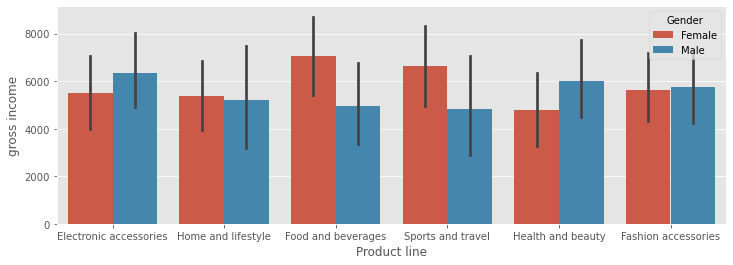

In [46]:
plt.figure(figsize = (12, 4))
sns.barplot(y = 'gross income', x = 'Product line', hue = 'Gender', data = port,)

From the above chart the following insights can be draw from each product line

   * Males customers appears to buy Electronic Accesories compared to female customers
   * The female to male ratio appears to be very close for customers opting in for Home and Lifestyle product line
   * Female Customers appears to be dominate when it come to Food and Beverages product line, which to an extent makes sense
   * For the sport and travel product line we can see that female customers are dominant
   * For the Health and beauty product line it appears that male customers are dominate in the supermarket most likely shopping      for their family
   * The male to female ratio appears to be close for customers opting in for Fashion Accessories product line.

In [47]:
port.groupby(['Customer type'])['gross income'].sum().reset_index().sort_values(by = 'gross income')

,Customer type,gross income
1,Normal,920355.84
0,Member,975107.70


* Total gross income made from registered members appears to be more compared to non members 

#### Total daily Gross Income by City

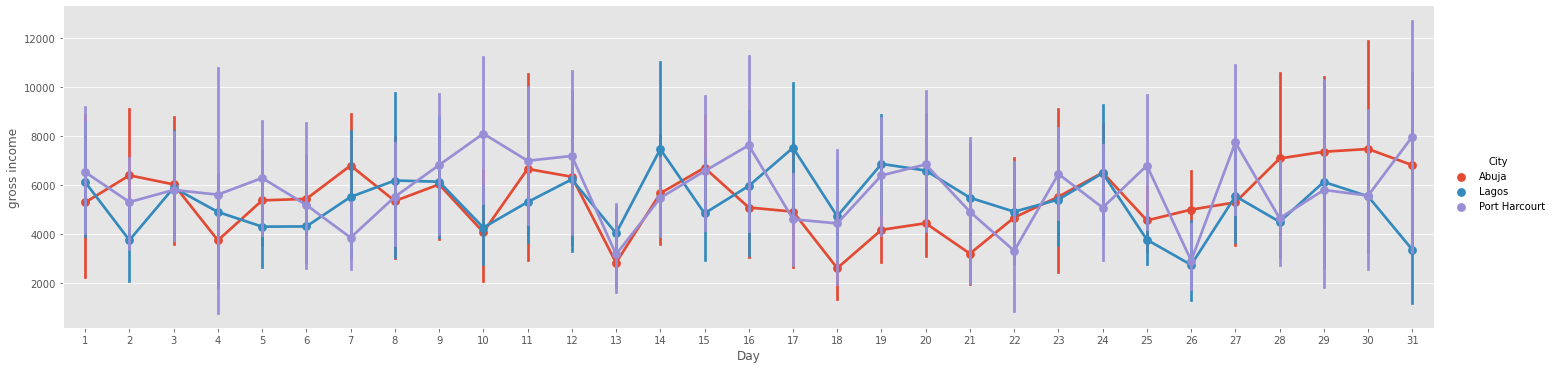

In [48]:
sns.catplot(x = 'Day', y = 'gross income',hue ='City', data = data, kind = 'point', aspect = 4)

From the Above point chart indicating gross income generated daily, we can see that port harcourt branch appears to be doing well progressively when compared to other branches

#### Port Harcourt Total daily Gross Income

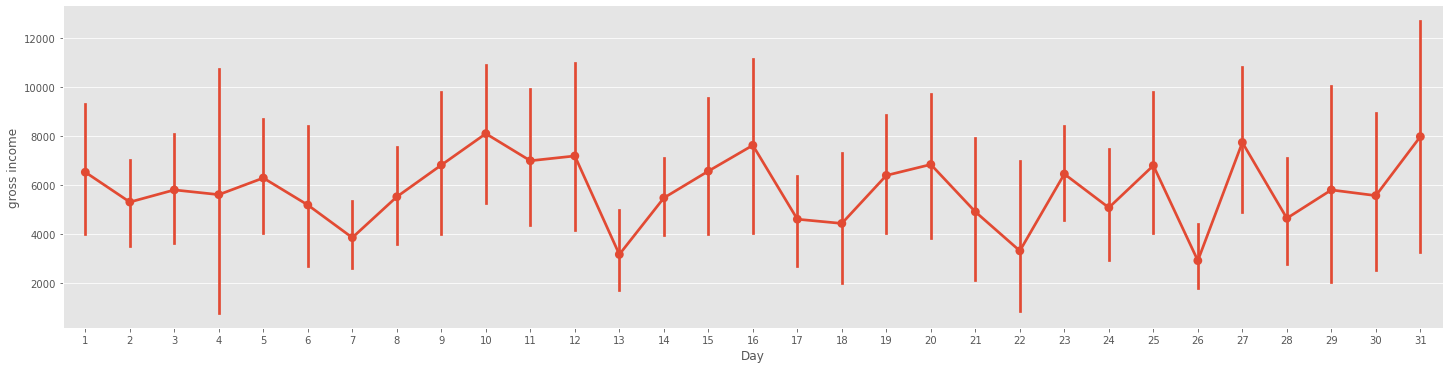

In [49]:
sns.catplot(x = 'Day', y = 'gross income', data = port, kind = 'point', aspect = 4)

### Effect of Numeric variables on 'Gross Income'

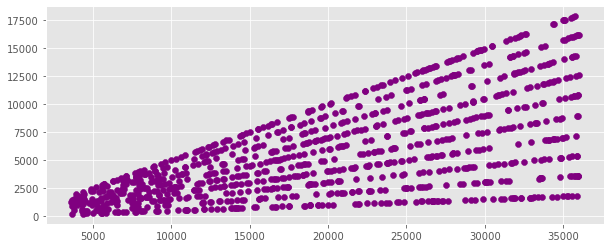

In [50]:
plt.figure(figsize = (10,4))
plt.scatter(data['Unit price'], data['gross income'], color = 'purple')

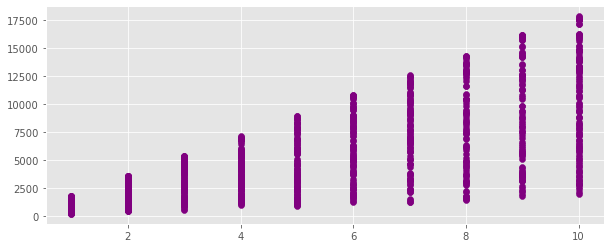

In [51]:
plt.figure(figsize = (10,4))
plt.scatter(data['Quantity'], data['gross income'], color = 'purple')

We can see that there is a strong positive correlation between unit price and gross income, simply indicating that the higher the price of product line the higher the gross income and the same holds for the number of quantity customer buy

## Step 7 - StandOut Section
To make your submission standout, 
* You can continue to explore more insights that can be uncovered with different plotting methods.
* Write a detailed summary on your approach, methods and insights. 
* Visit the [link](https://seaborn.pydata.org/tutorial/categorical.html) for more Seaborn visualization plots.


## Step 8 - Documentation.

* Write a detailed `ReadMe` that describes the project, explains important approach you followed to solve the tasks. Find a template in the starter file that can get you started quickly. Note: Do limit yourself to the template, you can include any interesting step that is worth sharing. 
* Write an Executive summary that you can present to `Company XYZ` management. The summary will explain your processes and insights you uncovered that can help the company 